LINEARER FIT EINER FUNKTION AN MESSDATEN
==========================================
In diesem notebook kann aus Messwerten, gespeichert als .txt, eine Modellfunktion (hier: linear) anhand der Methode der kleinsten Quadrate gewonnen werden. Der Code ist praktisch identisch mit dem Skript linfit.py.

Als erstes muss sichergestellt werden, dass die Messdaten in einem .txt file im working directory abgespeichert sind. D.h. in dem Verzeichnis, in dem dieses notebook abgespeichert liegt.

Nun werden die erforderlichen libraries und Funktionen importiert:

In [10]:
#!/bin/python
# Geschrieben 10/2020, Henry Korhonen henryk@ethz.ch, basierend auf Matlabskripten von Martin Willeke. Hinweise, Bemerkungen und Vorschläge bitte an henryk@ethz.ch.

import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from math import sqrt
import matplotlib.pyplot as plt

Als nächstes werden die Messdaten eingelesen. In der ersten Zeile muss sichergestellt werden, dass der Dateiname im Argument von read_table() exakt mit dem des Messwert-files übereinstimmt. Hier im Beispiel ist dies test_lin.txt. Die Messdaten müssen mit Leerschlägen getrennt werden. Alternativ kann man man den Parameter sep anpassen.

In [11]:
xy = pd.read_table('test_lin.txt', names=['x','y'], sep=r'\s+') # Lesen der Daten, erstellen eines Dataframes. Als Separator kommt hier eine unbestimmte Anzahl Leerschläge in Frage. Andernfalls "sep" anpassen.

y = xy['y'] # Relevante Daten aus dem Dataframe extrahieren. Achtung: "names" in pd.read_table gibt der ersten Spalte den Namen x und der zweiten y. Unbedingt sicherstellen, dass die richtigen Daten extrahiert werden!
x = xy['x']

N = len(y) # Anzahl Datenpunkte ermitteln.

Optional: Mit dem nächsten Stück code kann überprüft werden, ob die Daten richtig eingelesen wurden:

In [12]:
print('x: {0}\ny: {1}'.format(x, y))

x: 0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
Name: x, dtype: float64
y: 0     18.4
1     28.9
2     35.5
3     55.1
4     59.0
5     72.1
6     78.0
7     87.0
8     99.0
9    111.0
Name: y, dtype: float64


Nun will eine Funktion definiert werden. Hier wird eine Polynomfunktion ersten Grades gefittet.

In [13]:
def func(x, a, b): # Funktion definieren, die gefittet werden soll. Hier wird mit einer Polynomfunktion ersten Grades gearbeitet.

    return a*x +b

Im nächsten Schritt passiert die Ausgleichsrechnung. popt wird die Regressionskoeffizienten a und b enthalten, pcov enthält auf der Diagonalen die Varianz der jeweiligen Regressionskoeffizienten und deren Quadratwurzel ist die jeweilige Standardabweichung.

Optional: Die Auskommentierte Zeile tut das gleiche wie die erste, jedoch kann man dort einen Bereich angeben, in dem man die Koeffizienten vermutet. (Beispielsweise a würde zwischen alower und aupper vermutet werden)

In [14]:
popt, pcov = curve_fit(func, x, y) # fitten der Daten
# popt, pcov = curve_fit(func, x, y, bounds=([alower, blower], [aupper, bupper])) # fitten der Daten mit Eingrenzung der Regressionskoeffizienten
pstd = np.sqrt(np.diag(pcov)) # Standardabweichung der Regressionskoeffizienten. Nota bene: auf der Diagonalen von pcov stehen die Varianzen der Regressionskoeffizienten.

Das m%-Vertrauensintervall lässt sich gemütlich in vier Zeilen berechnen. m muss in diesem Fall hardcoded sein, also durch alpha definiert werden: m = 100*(1-alpha). p wird ermittelt, um sogleich automatisch die Anzahl Freiheitsgrade korrekt zu berechnen (dof), mit welchen der korrekte Student-T-Faktor ermittelt werden kann (t.ppf()).

In [15]:
alpha = 0.05 # m%-Vertrauensintervall: m = 100*(1-alpha)
p = len(popt)
dof = max(0,N-p) # Anzahl Freiheitsgrade (nota bene: das hängt von der Anzahl Regressionskoeffizienten in der Fitfunktion ab (siehe def func(...) oben)
tinv = stats.t.ppf(1.0-alpha/2., dof) # Student-T-Faktor ermitteln

Nun ist alles berechnet und die Ausgabe der Daten kann beginnen. Die ersten vier Zeilen listen sämtliche Regressionskoeffizienten mit ihrem jeweiligen m%-Vertrauensintervall und der jeweiligen Standardabweichung sowie die Anzahl Messungen und Freiheitsgrade auf.

Danach werden die Daten und die gefittete lineare Funktion zusammen geplottet. Dieser Plot wird noch nicht gezeigt, dies passiert erst ganz unten. Ebenfalls wird eine PNG-Datei sowie eine PDF-Datei davon erstellt. Für den Bericht ist die PDF-Datei am interessantesten, da sie Vektor- und keine Rastergrafik enthält. Der Dateiname sollte jeweils noch direkt im Skript unten im Argument von plt.savefig angepasst werden.

Et voilà.

Anzahl Freiheitsgrade: 8
Anzahl Messungen: 10
Parameter 1: 10.08121212123193 
 Vertrauensintervall: [9.350356901452516  10.812067341011344] 
 Standardabweichung: 0.3169357802425788 
Parameter 2: 8.953333333350681 
 Vertrauensintervall: [4.41849591232074  13.488170754380622] 
 Standardabweichung: 1.9665348175814596 


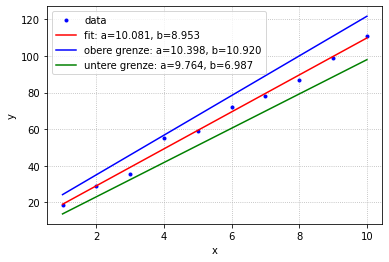

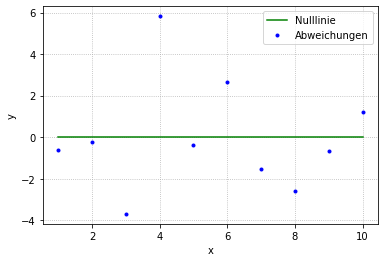

In [16]:
print('Anzahl Freiheitsgrade: {0}\nAnzahl Messungen: {1}\n=================================='.format(dof, N))
for i, regkoeff,var in zip(range(N), popt, np.diag(pcov)): # Hier werden alle Regressionskoeffizienten mit den entsprechenden Vertrauensintervallen ausgegeben.
    sigma = var**0.5
    print('Parameter {0}: {1} \n Vertrauensintervall: [{2}  {3}] \n Standardabweichung: {4} \n =================================='.format(i+1, regkoeff, regkoeff - sigma*tinv, regkoeff + sigma*tinv, sigma))

obere = popt+np.diag(pcov)**0.5*tinv
untere = popt-np.diag(pcov)**0.5*tinv

plt.plot(x,y,'b.',label='data') # Daten plotten
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # Gefittete Funktion plotten. Auch hier muss angepasst werden, wenn mehr als nur a und b genutzt werden sollen (siehe def func(...) oben)
# Man beachte, dass *popt der Funktion func() (die ja weiter oben definiert wurde) sämtliche Parameter weitergibt, die beim fitten bestimmt wurden. Das können auch mehrere sein; so viele, wie bei der Definition angegeben wurden.
plt.plot(x, func(x, *obere), 'b-', label='obere grenze: a=%5.3f, b=%5.3f' % tuple(popt+pstd))
plt.plot(x, func(x, *untere), 'g-', label='untere grenze: a=%5.3f, b=%5.3f' % tuple(popt-pstd))

plt.grid(linestyle=':') # grid zeichnen

plt.xlabel('x') # Labels setzen
plt.ylabel('y')
plt.legend() # Legende generieren

plt.savefig("dateiname1.pdf") # Plot als PDF-Datei speichern.
plt.savefig("dateiname1.png") # Plot als PNG-Datei speichern.

plt.show() # Plot anzeigen


plt.grid(linestyle=':')
plt.plot((x[0],x[N-1]),(0,0),'g-',label='Nulllinie')
plt.plot(x, y-func(x, *popt),'b.',label='Abweichungen')

plt.xlabel('x') # Labels setzen
plt.ylabel('y')
plt.legend() # Legende generieren

plt.savefig("dateiname2.pdf") # Plot als PDF-Datei speichern.
plt.savefig("dateiname2.png") # Plot als PNG-Datei speichern.

plt.show() # Plot anzeigen